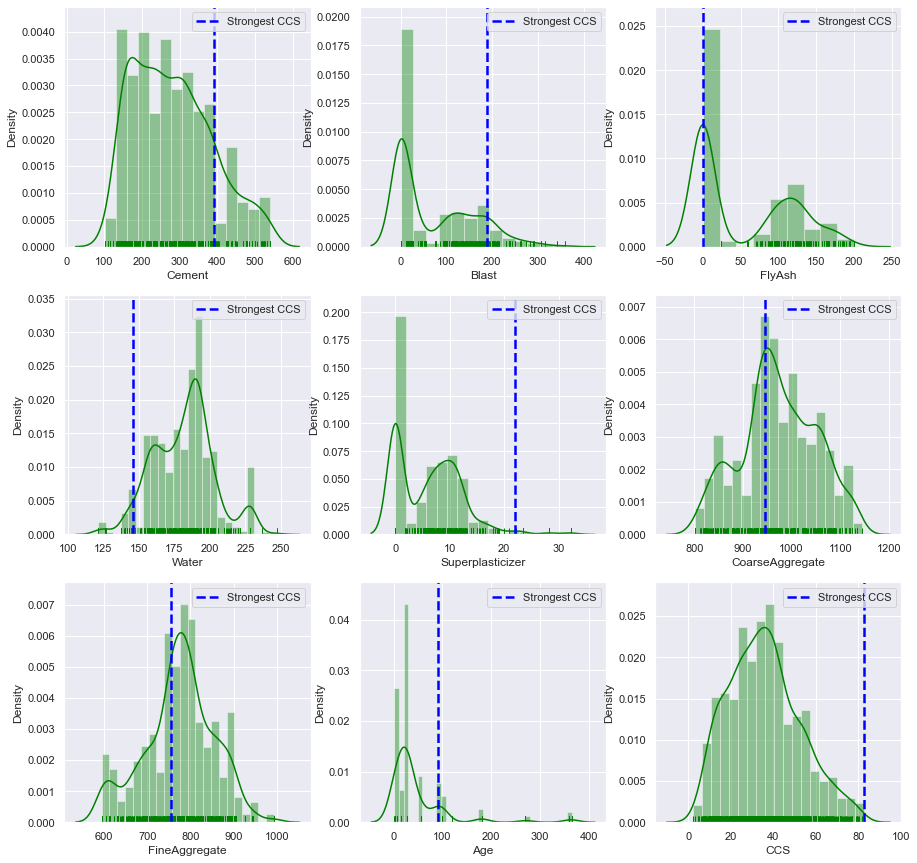

In [458]:
import warnings

warnings.filterwarnings('ignore')

from scipy import stats

import numpy as np

import pandas as pd

import statistics 

import math

from matplotlib import pyplot as plt

import statsmodels.formula.api as smf

import seaborn as sns

ConcreteFile = pd.read_excel('Concrete_Data.xls')

ConcreteFile.columns = ['Cement', 'Blast', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age', 'CCS']

sns.set()

fig, axes = plt.subplots(3, 3, figsize= (15,15))

x = 0

median = []

mean = []

strongCombo = [389.9, 189.0, 0.0, 145.9, 22.0 , 944.7, 755.8, 91, 82.599225]

for a in range(0, 3):

    for b in range(0, 3):
        
        col = ConcreteFile.iloc[:,x]
        
        sns.distplot(col,kde = True,rug=True,ax=axes[a,b], color = 'green')
        
        axes[a,b].axvline(x=strongCombo[x],color='blue',ls='--', lw=2.5, label='Strongest CCS') #https://datavizpyr.com/how-to-add-a-mean-median-line-to-a-seaborn-displot/
        
        axes[a,b].legend()
        
        median.append(round(col.median(), 2))
        
        mean.append(round(col.mean(), 2))
        
        #print('[algo check] row',a,'column',b,'dframe column',x)    

        x += 1
        
plt.show()


<AxesSubplot:>

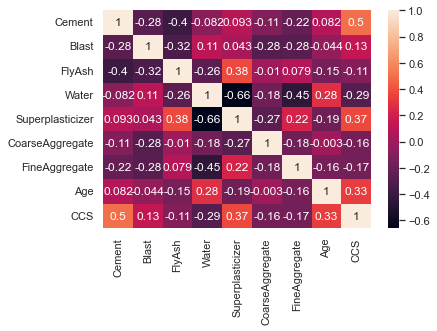

In [459]:
corrMatrix = ConcreteFile.corr()
sns.heatmap(corrMatrix, annot=True)

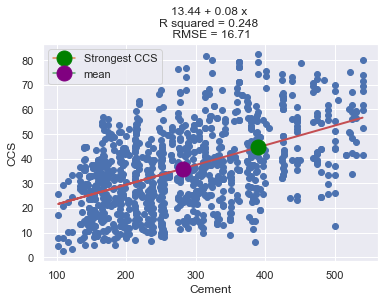

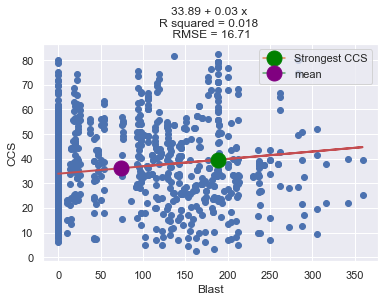

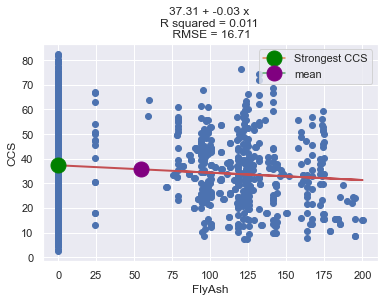

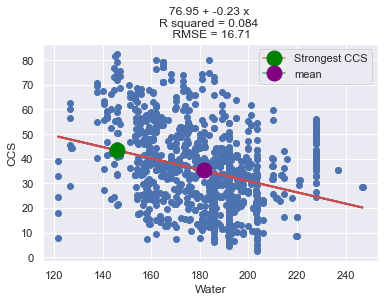

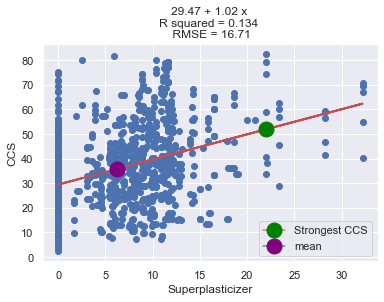

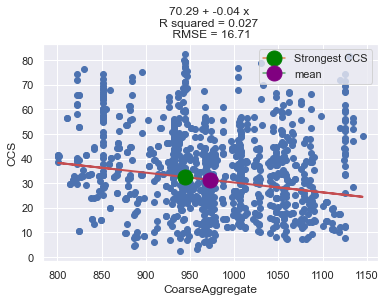

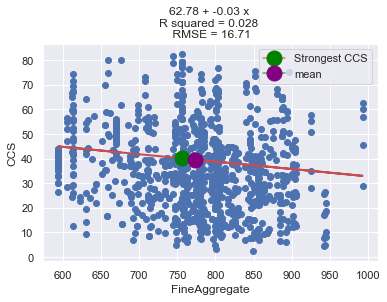

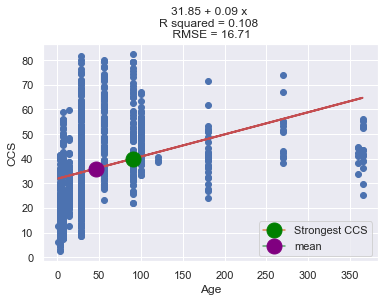

In [460]:
import numpy as np

import pandas as pd

import statistics 

import math

from matplotlib import pyplot as plt

import statsmodels.formula.api as smf

formulas = []

columns = list(ConcreteFile)

for x in range(len(columns)):
    
    if columns[x] != 'CCS':
         
        model = smf.ols('CCS ~'+ columns[x], data=ConcreteFile)
        
        model = model.fit()
        
        intercept = model.params[0]
        
        slope = model.params[1]
        
        Rsquare = model.rsquared
        
        RMSE = math.sqrt(model.mse_total)
        
        NP_pred = model.predict()
        
        titleline = str(round(intercept,2)) + ' + ' + str(round(slope,2)) + ' x \n' + 'R squared = ' + str(round(Rsquare,3)) + ' \n RMSE = ' + str(round(RMSE,2))
        
        formulas.append([columns[x],'intercept: ', round(intercept,2),'slope: ', round(slope,2)])
        
#         plt.figure(figsize=(10, 6))
        
        plt.plot(ConcreteFile[columns[x]], ConcreteFile['CCS'], 'o')
        
        plt.plot()
        
        pred = []
        
        for val in ConcreteFile[columns[x]]:
            
            pred.append(val*round(slope,2) + round(intercept,2))
            
        plt.plot(ConcreteFile[columns[x]], pred, 'r', linewidth=2)   # regression line
        
        strongy = []
        
        mediany = []
        
        meany = []
        
        for y in range(len(strongCombo)):
            
            strongy.append(strongCombo[y]*round(slope,2) + round(intercept,2))
            
            meany.append(mean[y]*round(slope,2) + round(intercept,2))
            
        plt.plot(strongCombo[x], strongy[x], marker="o", markersize=15, markeredgecolor="green", markerfacecolor="green", label = 'Strongest CCS')
        
        plt.plot(mean[x], meany[x], marker="o", markersize=15, markeredgecolor="purple", markerfacecolor="purple", label = 'mean')
        
        plt.legend()
        
        plt.xlabel(columns[x])
        
        plt.ylabel('CCS')
        
        plt.title(titleline)
        
        plt.show()

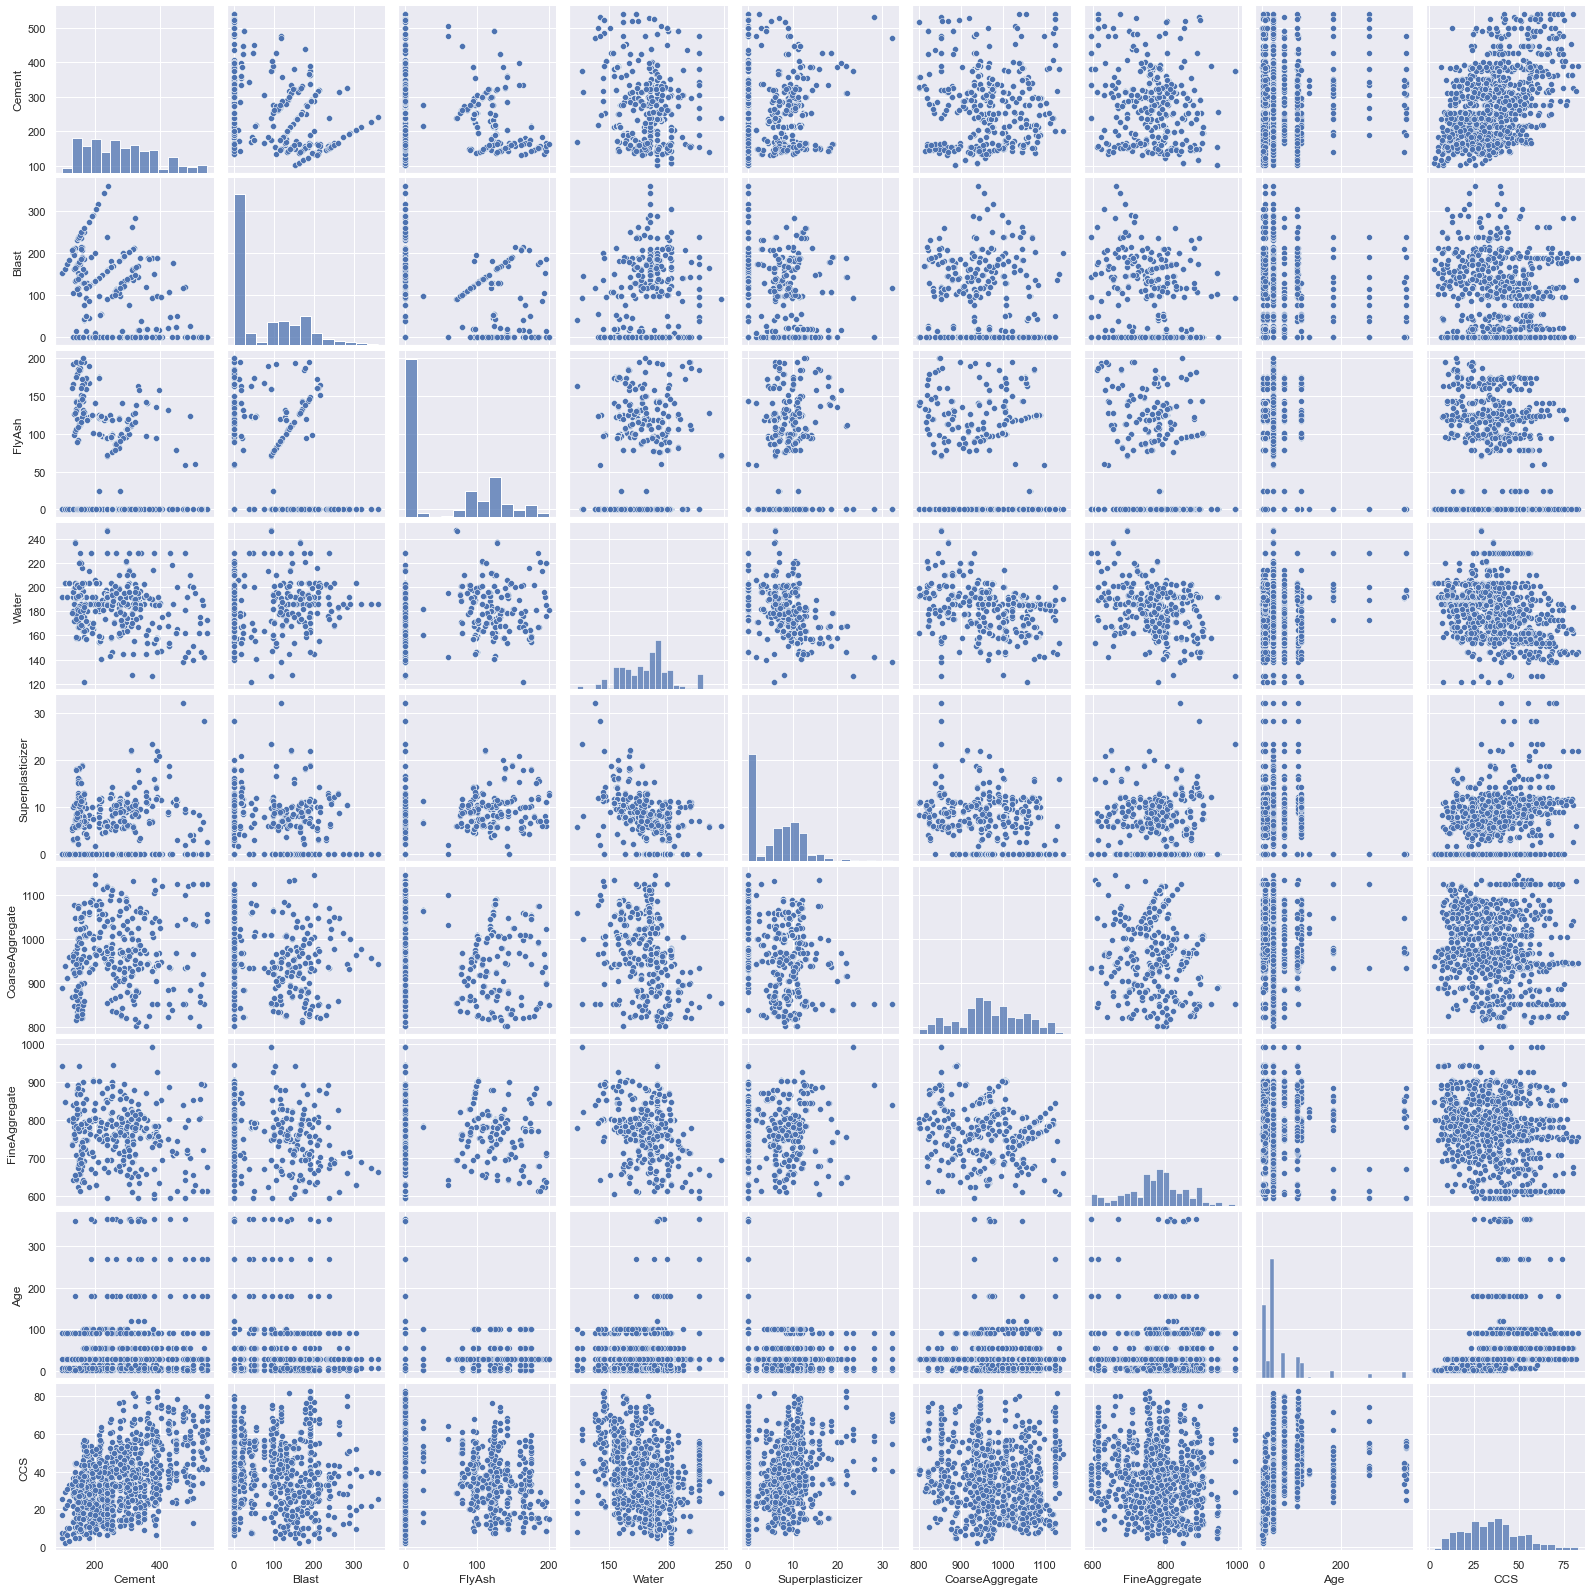

In [461]:
import matplotlib.pyplot  
import seaborn 
%matplotlib inline
seaborn.pairplot(ConcreteFile)
matplotlib.pyplot.show()

<font size = '3'>With the histograms and the heatmap above, the relationship between compressive strength and the various elements can be depicted. For Cement, a value of around 400 is optimal for the strongest strength. Moreso, the heatmap verifies the fact that Cement has the highest correlation to total compressive strength; about 1/2. This is also true since Cement has the highest slope when compared to all other materials in the OLS regression models. To add, for both FlyAsh and Water, a lesser amount is optimal for a stronger compressive strength as well. It can also be seen from both the heatmap and the Ordinary Least Squares regression, that a lesser amount of these two is optimal for a higher compressive strength, as both the correlation and the coefficients are negative. Coarse Aggregate and Fine Aggregate also both have a negative correlatrion with total compresisve strength as well. As seen from the Multivariate graphs, the less water there is, the more the other elements are to be added to the mixture for strength. With the heatmap and ordinary least squares regression, the relationships between the various compounds can be seen. As depicted, FlyAsh and water mixtures result in a lower overall strength. More than this, it can be seen that Cement has the highest correlation to the overall strength, as its heatmap correlation is 1/2.</font>

# Here is the combination for the strongest compressive strength

In [462]:
strongest = ConcreteFile[ConcreteFile['CCS'] == ConcreteFile['CCS'].max()]
strongest

,Cement,Blast,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CCS
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.599225


# To Set up data models for predicting the compressive strength, we must first train our algorithms. The tests will be trained with 66.66% of the data, and will be tested on the remaining 33.33%
# We will use SciKit Learn to train the models

In [463]:
y = ConcreteFile['CCS'] # Target variable
X = ConcreteFile.loc[:, ConcreteFile.columns != "CCS"] # all columns except target

In [464]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66,random_state=0)

In [465]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression() 

regressor.fit(X_train, y_train) #model trained on 2/3 of data

y_pred=regressor.predict(X_test) #model tested on 1/3 of data

intcpt = regressor.intercept_

coeff = regressor.coef_

pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

pred_df 

,Actual,Predicted
747,26.062193,40.736845
718,10.354551,13.991308
175,79.296635,61.097311
828,74.987410,54.115077
713,9.694722,23.827204
...,...,...
455,51.255646,37.924613
584,21.917063,43.254608
991,38.215586,53.586478
160,77.297154,57.261217


In [466]:
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 8.200375846802032
Mean Squared Error: 107.0709738524697
Root Mean Squared Error: 10.347510514731054


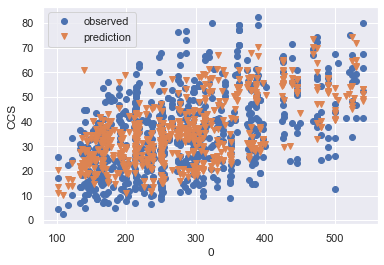

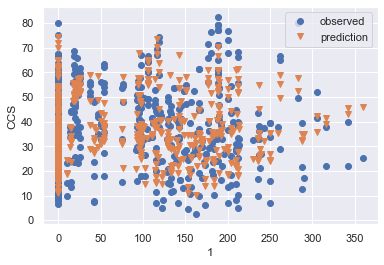

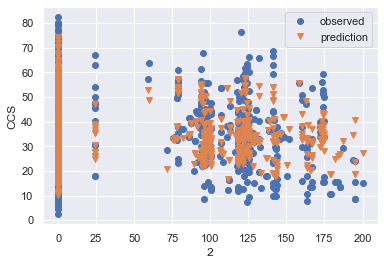

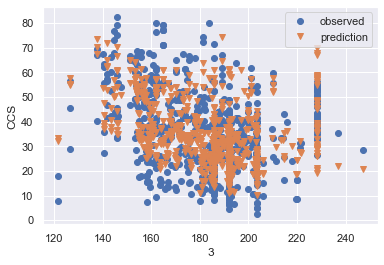

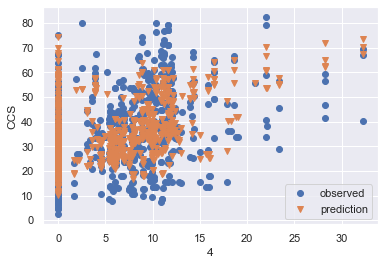

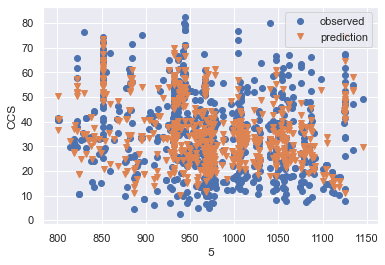

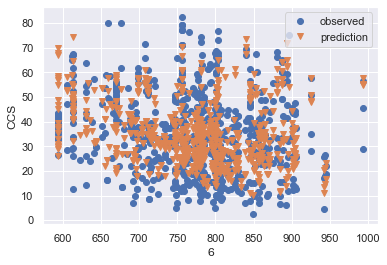

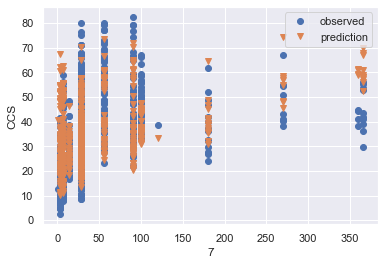

In [467]:
for x in range(len(columns)):
    if columns[x] == 'CCS':
        break
        
    plt.plot(X_test[columns[x]], y_test, 'o', label = 'observed')
        
    plt.xlabel(x)
    
    plt.ylabel('CCS')
    
    plt.plot(X_test[columns[x]], y_pred, 'v', label = 'prediction')
        
    plt.legend()
        
    plt.show()
    

# We can use the models to produce equations in order to estimate the compressive strength of the concrete:

In [484]:
import math

def calculate_CCS(Cement, Blast, FlyAsh, Water, Sup, Coarse, Fine, Age):
            
    ccs = intcpt + Cement*coeff[0] + Blast*coeff[1] + FlyAsh*coeff[2] + Water*coeff[3] + Sup*coeff[4]+ Coarse*coeff[5]+ Fine*coeff[6]+ Age*coeff[7]
    
    return ccs

In [511]:
def accuracy_score(pred,obs):
    accuracy = 100 - (abs(pred - obs)/obs)*100
    return accuracy

100.0

Logarithmic Model

In [502]:
math.log(calculate_CCS(389.9, 189, 0, 145.9, 22, 944.7, 755.8, 91))

4.252704343439249

In [526]:
print('accuracy of logarithmic predictor: ')

accuracy_score(float(strongest['CCS']),math.log(calculate_CCS(389.9, 189, 0, 145.9, 22, 944.7, 755.8, 91)))

accuracy of logarithmic predictor: 


-1742.2752707327948

Here with a logarithmic model, it can be seen that the model does not produce a close result to the observation for the strongest strength

Exponential model: 

In [514]:
def calculate_CCS_exp(Cement, Blast, FlyAsh, Water, Sup, Coarse, Fine, Age):
            
    ccs = intcpt*(Cement**coeff[0]* Blast**coeff[1]* FlyAsh**coeff[2]* Water**coeff[3]* Sup**coeff[4]* Coarse**coeff[5]* Fine**coeff[6]* Age**coeff[7])
    
    return ccs

In [515]:
calculate_CCS_exp(389.9, 189, 1, 145.9, 22, 944.7, 755.8, 91)

-695.5465164465788

In [517]:
print('accuracy of exponential predictor: ')

accuracy_score(float(strongest['CCS']),calculate_CCS_exp(389.9, 189, 0, 145.9, 22, 944.7, 755.8, 91))

accuracy of exponential predictor: 


inf

Here the exponential model does not produce an accurate result since the accuracy is not near 100% at all, moreso. any 0s will result in the prediction being 0 as well. This does not work with the predictions as the observations include 0 values for elements such as FlyAsh

Linear Model: 

In [518]:
calculate_CCS(389.9, 189, 0, 145.9, 22, 944.7, 755.8, 91)

70.2952580469078

In [520]:
print('accuracy of linear predictor: ')

accuracy_score(float(strongest['CCS']),calculate_CCS(389.9, 189, 0, 145.9, 22, 944.7, 755.8, 91))

accuracy of linear predictor: 


82.49673293057435

With a linear model, the estimate is much closer to the observation when compared to the others

# Decision Tree Model

In [527]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state = 0) 

regressor.fit(X_train, y_train)

learn = [[389.9, 189, 1,145.9,22,944.7,755.8,91]]

y_pred = regressor.predict(learn)

print('prediction: ', y_pred)

print('observation: ', float(strongest['CCS']))

prediction:  [74.4978818]
observation:  82.5992248


In [525]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(np.array(y_train).reshape(-1, 1))

In [496]:
print('accuracy of linear predictor: ')

accuracy_score(float(strongest['CCS']),calculate_CCS(389.9, 189, 0, 145.9, 22, 944.7, 755.8, 91))

35.674886753487584


In [ ]:
df = df.append(df2, ignore_index = True)